In [1]:
# Imports needed for the script
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score

In [4]:
# Loading the data
train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')

# Store our test passenger IDs for easy access
#PassengerId = test['PassengerId']

# Showing overview of the train dataset
#train.head()

In [5]:
# Copy original dataset in case we need it later 
original_train = train.copy() # Using 'copy()' allows to clone the dataset, creating a different object with the same values

# Feature engineering steps taken from Sina and Anisotropic, with minor changes to avoid warnings
#full_data = [train, test]

# Feature that tells whether a passenger had a cabin on the Titanic
#train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
#test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Feature selection: remove variables no longer containing relevant information
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
#test  = test.drop(drop_elements, axis = 1)

In [12]:
train.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,22.0,0,7.2500,S
1,1,1,female,38.0,0,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,0,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [15]:
sex = pd.get_dummies(train.Sex,drop_first=True)
em = pd.get_dummies(train.Embarked,drop_first=True)

In [17]:
train = train.drop(['Sex','Embarked'],axis=1)

In [19]:
train = pd.concat([train,sex,em],axis=1)

In [20]:
train.head()

,Survived,Pclass,Age,Parch,Fare,male,Q,S
0,0,3,22.0,0,7.2500,1,0,1
1,1,1,38.0,0,71.2833,0,0,0
2,1,3,26.0,0,7.9250,0,0,1
3,1,1,35.0,0,53.1000,0,0,1
4,0,3,35.0,0,8.0500,1,0,1


In [28]:
train = train.dropna()

In [21]:
from sklearn.model_selection import train_test_split

In [34]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [35]:
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y = train['Survived'].values
X = train.drop(['Survived'], axis=1).values 

In [36]:
# Create Decision Tree with max_depth = 3
DT = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [37]:
DT.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
predict = DT.predict(X_testset)

In [39]:
print("DecisionTrees's Accuracy: ", accuracy_score(y_testset, predict))

DecisionTrees's Accuracy:  0.8046511627906977


In [40]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [65]:
y_trainset=y_trainset.astype('str')

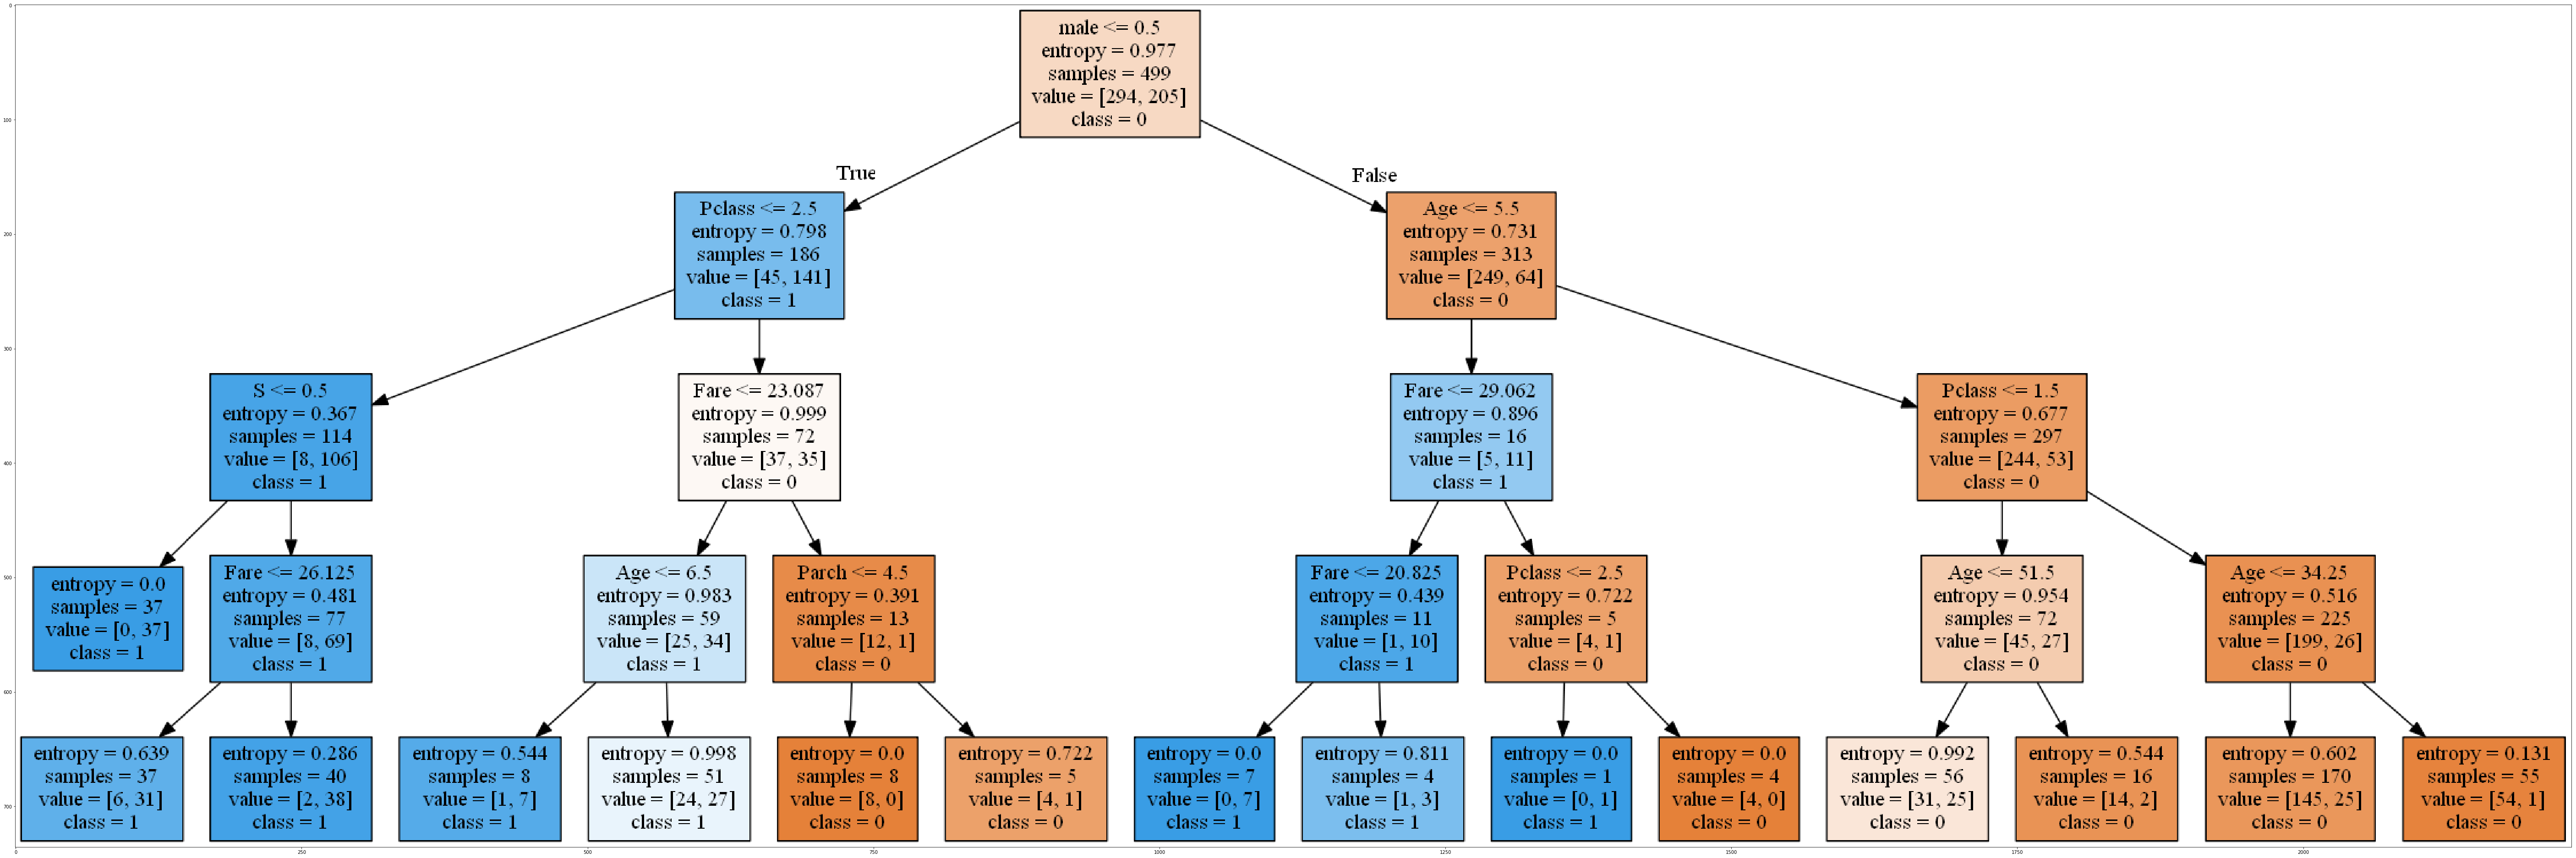

In [67]:
dot_data = StringIO()
filename = "titanictree.png"
featureNames = train.columns[1:8]
targetNames = train.Survived.unique().tolist()
out=tree.export_graphviz(DT,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')